## Overview of PyDeltaRCM

How does vegetation influence sediment and water transport in deltas? To answer this question, we can use a python package called pyDeltaRCM, a numerical model that tracks deltaic growth and evolution. It can account for natural processes in prograding  coastal deltas such as sediment transport and deposition, channel avulsions, and channel migrations. 

* Model PyDeltaRCM is an open source, 2D depth average morphodynamic model. 
* Developer: Mariela Perignon (Python version of the Matlab deltaRCM model by Man Liang). 
* PyDeltaRCM is a parcel-based cellular flux routing and sediment transport model that can simulate the planform evaluation due to sediment movement and vegetation model. It is a  reduced-complexity model (RCM), different from the process-based morphodynamic models based on detailed computational fluid dynamics by employing stochastic parcel-based cellular routing schemes for water and sediment transport. The model requires different parameters and variables as input including topography, flow discharge, bed roughness and produces outputs including depth-averaged flow field, water surface elevation and evolving bed topography. 

<br>

---

<br>

Next, we need to download the necessary packages

In [2]:
import numpy as np
import matplotlib.pyplot as plt

Then, we have to import the pyDeltaRCM package

In [32]:
import pyDeltaRCM

Now that we have installed and brought PyDeltaRCM into our jupyter environment, we can begin to run a simulation without vegetation present

<br>

---

<br>

Using this code block, we can run the PyDeltaRCM simulation. We are using default values for every parameter not specified in the parentheses. To see the parameters options, you can use this code

In [31]:
pyDeltaRCM.DeltaModel #show parameters

pyDeltaRCM.model.DeltaModel

In [33]:
# create a simulated delta model (default values in [brackets])
delta = pyDeltaRCM.DeltaModel(
    dx=200,                # grid spacing [50 m]
    Np_water=200,          # input water parcels [2000]
    Np_sed=50,             # input sediment parcels [2000]
    C0_percent=0.2,        # input sediment concentation [0.1 %]
    save_eta_grids=True,   # save the topography data [False]
    save_dt=0,             # save interval of 0 seconds [86400]
    clobber_netcdf=True,   # over-write any existing output files [False]
    sand_frac_bc=1,         #sand fraction boundary condition
    )

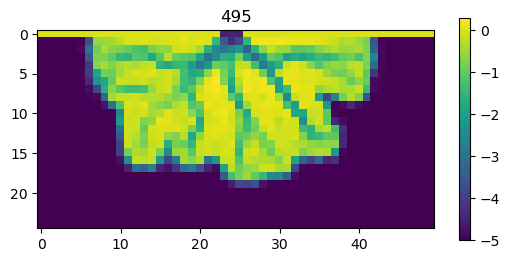

In [34]:
# now loop for 500 timesteps, and plot every 5th step
from IPython.display import clear_output

for i in range(0, 500):
    delta.update()
    if (i % 5) == 0:
        clear_output(wait=True)
        fig, ax = plt.subplots()
        im = ax.imshow(delta.eta)
        plt.colorbar(im, ax=ax, shrink=0.6)
        ax.set_title(i)
        plt.show()

delta.finalize()

Cool right? However, there is no vegetation in this model, which is difficult to compare to coastal deltaic marshes such as the Mississippi River delta. Lets add vegetation

We need to import the vegetation package from the repository to use. 

In [35]:
from VegetationModel import VegetationModel

Initiate model using the input file

In [36]:
delta_veg = VegetationModel(
    input_file='./vegetation.yaml',
    out_dir='./vegetation_output',
    save_checkpoint=True,
    save_dt=86400,
    clobber_netcdf=True,
    vegetation=True, #can make false to turn off veg
    save_veg_frac_figs = True,
    )

Time: 0.0; timestep: 0


Now, we can 

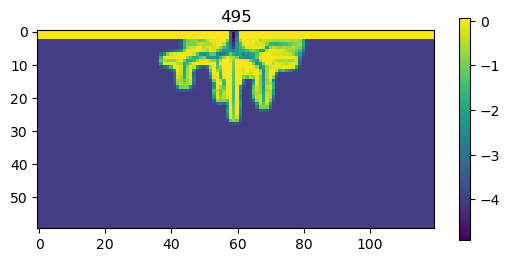

Time: 7268181.8; timestep: 533
Time: 7281818.2; timestep: 534
Time: 7295454.5; timestep: 535
Time: 7309090.9; timestep: 536


In [38]:
for i in range(0, 500):
    delta_veg.update()
    if (i % 5) == 0:
        clear_output(wait=True)
        fig, ax = plt.subplots()
        im = ax.imshow(delta_veg.eta)
        plt.colorbar(im, ax=ax, shrink=0.6)
        ax.set_title(i)
        plt.show()

delta_veg.finalize()